# BIG DATA: Práctica: Regresión con `sklearn`
### Cargar las librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Función "ground truth"

$$\large y = 0.95x^3 + 6x^2 + 17x +10$$

In [2]:
# nuestros parametros "beta"
b3 =  0.95
b2 =  6
b1 =  17
b0 =  10
#x = np.linspace(-5,1,60)
x = np.arange(-5, 1, 0.1)

In [3]:
# fijar una "semilla"
np.random.seed(42)

In [4]:
df = pd.DataFrame(x, columns = ['x'])

# ground truth sin ruido
df["gt"] = b3*df["x"]**3  + b2*df["x"]**2 + b1*df["x"] + b0 

# añadir un poco de ruido aleatorio
jitter = 1*(np.random.randn(60)-0.5)

df["y_true"] = df["gt"]+jitter

df.head()

,x,gt,y_true
0,-5.0,-43.75000,-43.753286
1,-4.9,-41.00655,-41.644814
2,-4.8,-38.42240,-38.274711
3,-4.7,-35.99185,-34.968820
4,-4.6,-33.70920,-34.443353


## Echar un vistazo

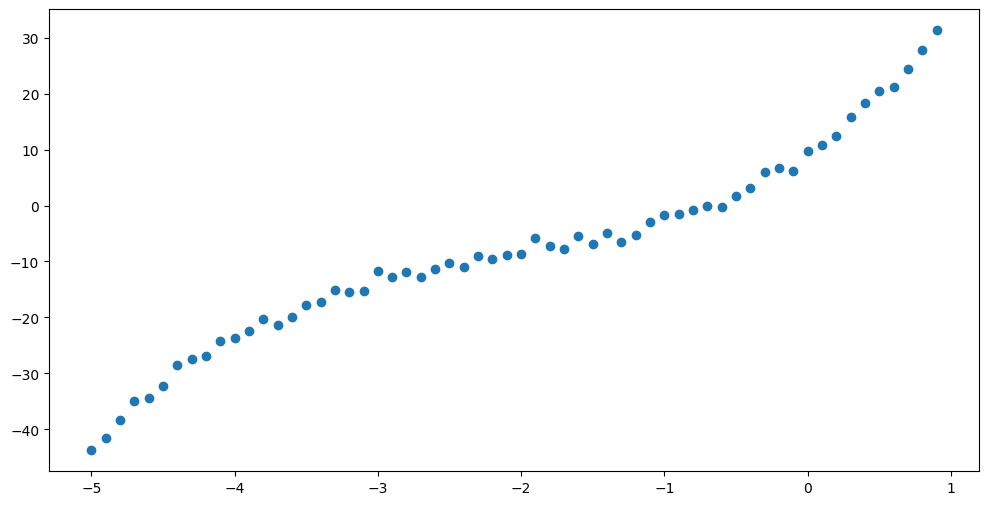

In [5]:
fig = plt.figure(figsize=(12, 6))
plt.scatter( df["x"], df["y_true"] );

# Modelo "Baseline"

In [6]:
y_mean = df["y_true"].mean()
print(y_mean)

-8.001654683070626


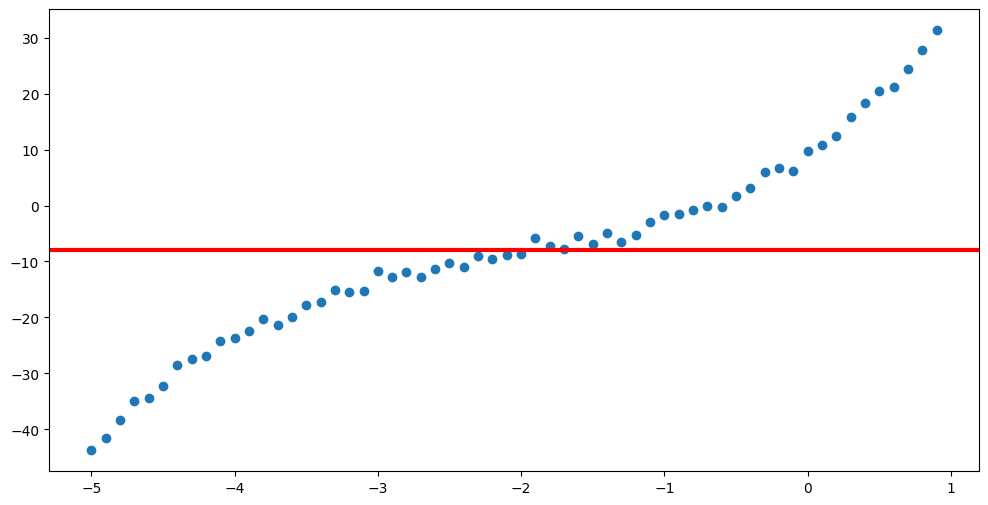

In [7]:
fig = plt.figure(figsize=(12, 6))
plt.scatter( df["x"], df["y_true"] )
plt.axhline(y = y_mean, color = 'r', lw = 3, linestyle = '-');

In [8]:
df["baseline"]  = df["y_true"].mean()

## Métrica del "baseline": RMSE

**RMSE** ([`sklearn.metrics.mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html))

El raíz del error cuadrático medio

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df["y_true"], df["baseline"], squared=False)

16.917070133940193

# Modelo: Regresión lineal
[`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

$$\large  \hat{y} = \beta_1 x + \beta_0 $$

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(df["x"].values.reshape(-1, 1), df["y_true"])

y_pred    = regressor.predict(df["x"].values.reshape(-1, 1))

In [11]:
print("b1 = ",regressor.coef_[0])
print("b0 = ",regressor.intercept_,)

b1 =  9.496656887024606
b0 =  11.466491935329916


### Añadir el *fit* (ajuste) al plot

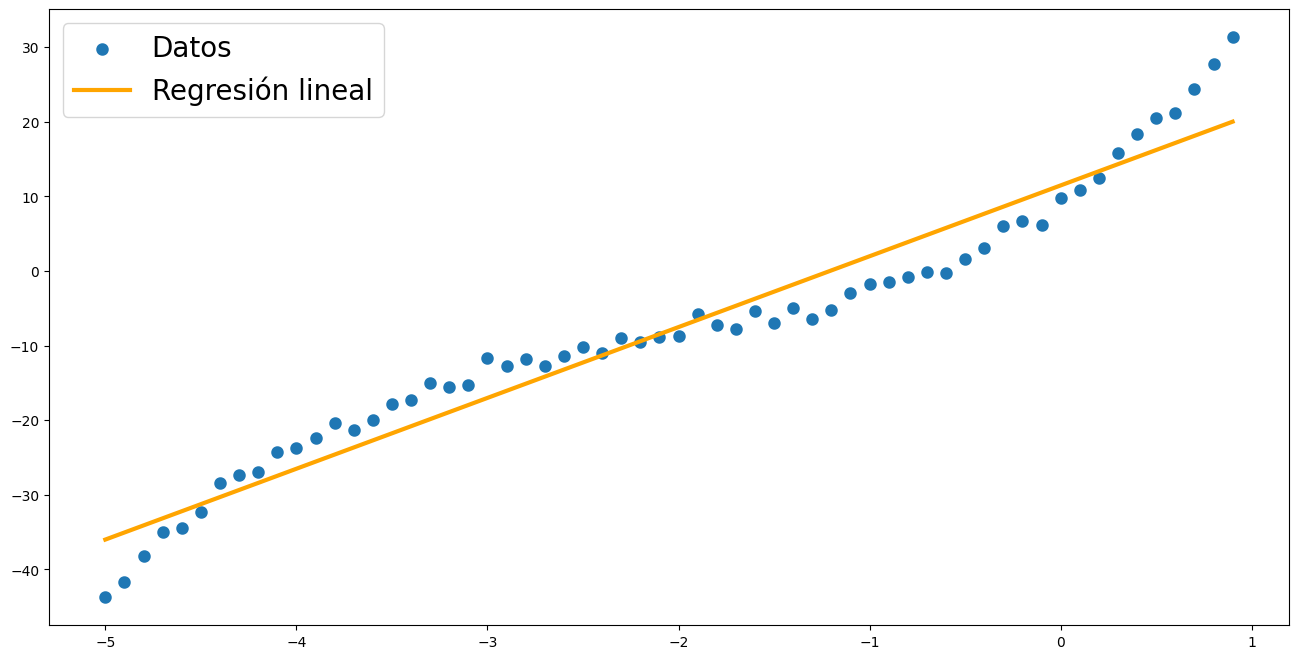

In [12]:
fig = plt.figure(figsize=(16, 8))
fig_1 = plt.scatter(df["x"], df["y_true"], lw=3, label="Datos")
fig_1 = plt.plot(df["x"], y_pred, lw=3, color="orange", label="Regresión lineal")
plt.legend(["Datos", "Regresión lineal"], loc ="upper left", fontsize=20);

### Métrica: Resultados

**RMSE** ([`sklearn.metrics.mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html))

In [13]:
mean_squared_error(df["y_true"], y_pred, squared=False)

3.9626936844856644

# Añadir polinomial features a nuestro regresión lineal

$$\large y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0 $$

In [14]:
# note we ignore the cross-terms X1 +X2 +X1^2 +X2^2 y X1X2 (cubic expansion: X1^3 + X2^3 + X1 X2^2 + X1^2 X2)
df["x_cuadrado"] = df["x"]**2
df["x_cubo"]     = df["x"]**3

# ver el nuevo dataframe
df.head()

,x,gt,y_true,baseline,x_cuadrado,x_cubo
0,-5.0,-43.75000,-43.753286,-8.001655,25.00,-125.000
1,-4.9,-41.00655,-41.644814,-8.001655,24.01,-117.649
2,-4.8,-38.42240,-38.274711,-8.001655,23.04,-110.592
3,-4.7,-35.99185,-34.968820,-8.001655,22.09,-103.823
4,-4.6,-33.70920,-34.443353,-8.001655,21.16,-97.336


In [15]:
# el ajustex = df[["x","x_cuadrado","x_cubo"]]
x = df[["x","x_cuadrado","x_cubo"]]
regressor.fit(x, df["y_true"])

#predecir
y_pred    = regressor.predict(x)

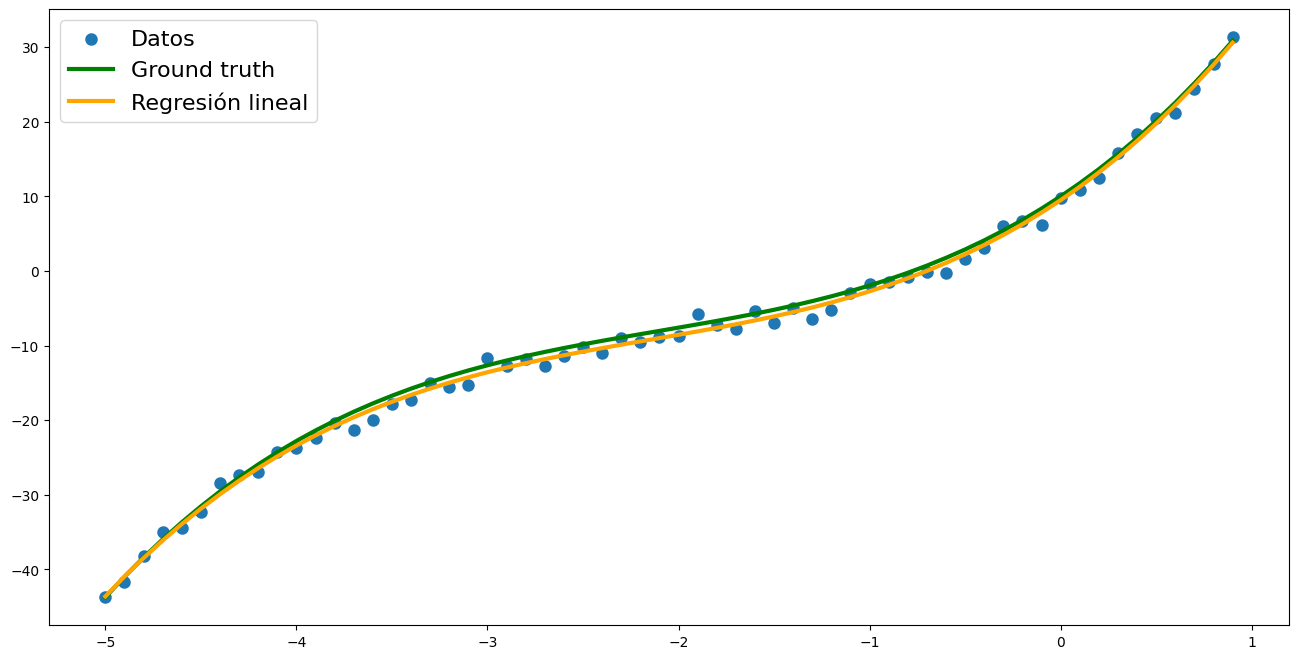

In [16]:
# plot
fig = plt.figure(figsize=(16, 8))
fig = plt.scatter(df["x"], df["y_true"], lw=3, label="Datos")
fig = plt.plot(df["x"], df["gt"], lw=3, label="Ground truth", color="green")
fig = plt.plot(df["x"], y_pred, lw=3, color="orange", label="Regresión lineal")
plt.legend(["Datos","Ground truth","Regresión lineal"], loc ="upper left", fontsize=16);

# Miramos los $\beta$ del ajuste

In [17]:
print("b3 = ",round(regressor.coef_[2],2))
print("b2 = ",round(regressor.coef_[1],2))
print("b1 = ",round(regressor.coef_[0],2))
print("b0 = ",round((regressor.intercept_),2))

b3 =  0.93
b2 =  6.0
b1 =  17.3
b0 =  9.49


recuerda, en nuestro ecuacion original hay `b3 = 0.95`, `b2 = 6`,  `b1 = 17`, `b0 = 10` asi que nuestro "fit" no esta mal!

### métrica

In [18]:
print("RMSE: ",mean_squared_error(df["y_true"], y_pred, squared=False))

RMSE:  0.8558310009254048


# Modelo: Árboles de decisión (Decision trees)
[`sklearn.tree.DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=1)

### Ejemplo sencillo:

In [20]:
coordinadas = {
    'x' : [1, 2, 4, 5],
    'y' : [1, 1, 2, 2],
}
  
# crear Dataframe 
small_df = pd.DataFrame(coordinadas)

regressor.fit(small_df["x"].values.reshape(-1, 1), small_df["y"])

DecisionTreeRegressor(max_depth=1)

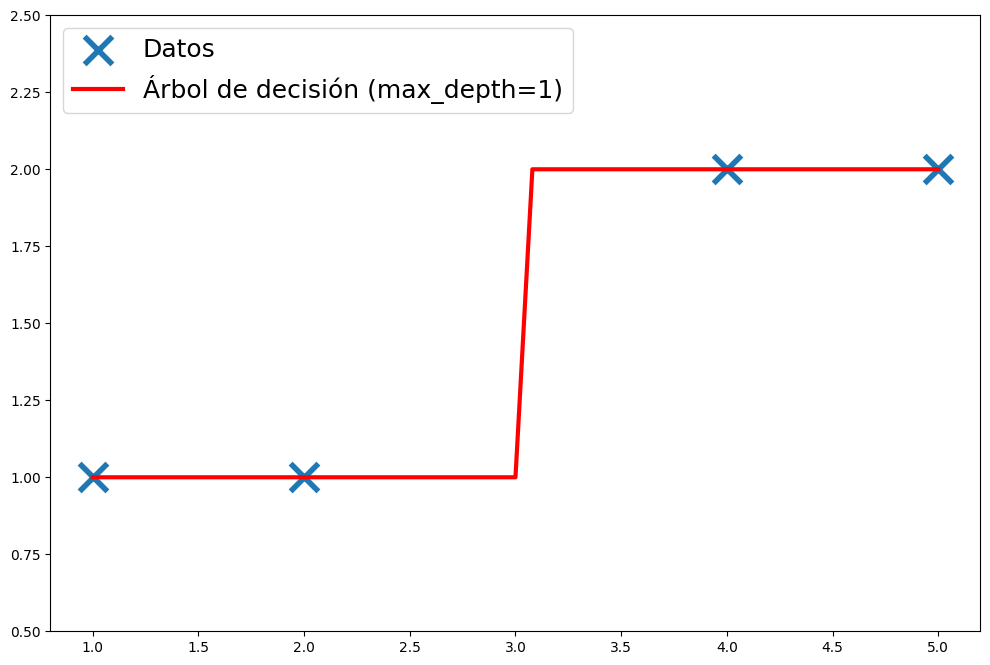

In [21]:
fig = plt.figure(figsize=(12, 8))
fig = plt.scatter(small_df["x"], small_df["y"], s=400, lw=4, label="Datos", marker="x")

x = np.linspace(1, 5, 51)
y_pred = regressor.predict(x.reshape(-1, 1))
fig = plt.plot(x, y_pred, lw=3, color="red", label="Árbol de decisión")

plt.legend(["Datos", "Árbol de decisión (max_depth=1)"], loc ="upper left", fontsize=18)
plt.ylim(0.5, 2.5);

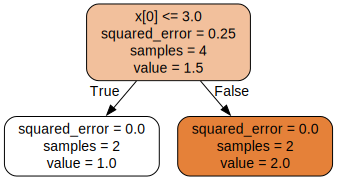

In [22]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(regressor, filled=True, rounded=True, proportion=False)
graphviz.Source(dot_data)

# Ya con nuestros datos de antes

In [23]:
max_depth = 1

In [24]:
regressor = DecisionTreeRegressor(max_depth=max_depth)

regressor.fit(df["x"].values.reshape(-1, 1), df["y_true"])

y_pred = regressor.predict(df["x"].values.reshape(-1, 1))

## Ver nuestro decision tree

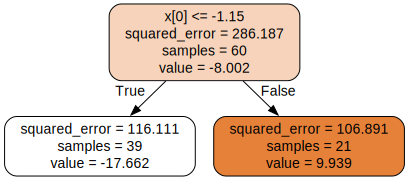

In [25]:
dot_data = export_graphviz(regressor, filled=True, rounded=True, proportion=False)
graphviz.Source(dot_data)
# We comment this becuase we will have 100 trees

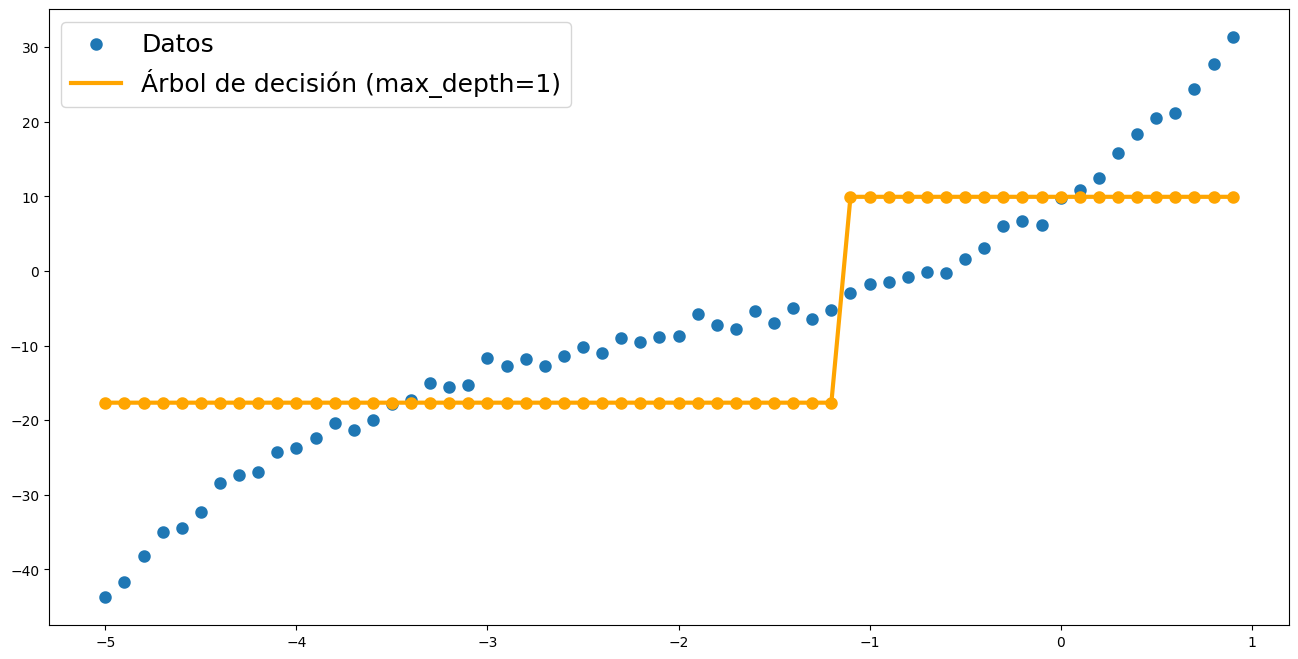

In [26]:
fig = plt.figure(figsize=(16, 8))
fig = plt.scatter(df["x"], df["y_true"], lw=3, label="Datos")
fig = plt.plot(df["x"], y_pred, lw=3, color="orange", label="Árbol de decisión")
fig = plt.scatter(df["x"], y_pred, lw=3, color="orange", label="Árbol de decisión")

plt.legend(["Datos", "Árbol de decisión (max_depth=1)"], loc ="upper left", fontsize=18);

In [27]:
print("RMSE: ",mean_squared_error(df["y_true"], y_pred, squared=False))

RMSE:  10.624677780559928


## Resultados

| Estimator  | RMSE | 
| --- |  --- | 
| Baseline | 16.91 |
| `LinearRegression`  | 3.96 |
| Polinomial regression | 0.8558 |
| `DecisionTreeRegressor (max_depth=1) ` |  10.62 |
| `DecisionTreeRegressor (max_depth=2) ` |  5.326 |
| `DecisionTreeRegressor (max_depth=5) ` |  0.520 |


# Overfitting

Vamos cambiando el hiperparametro `max_depth` a ser cada vez mayor:

In [28]:
# nuestros parametros "beta"
b3 =  0.95
b2 =  6
b1 =  7
b0 =  10
x = np.arange(-5, 1, 0.1)
df = pd.DataFrame(x, columns = ['x'])
df["y_true"] = b3*df["x"]**3  + b2*df["x"]**2 + b1*df["x"] + b0 

In [29]:
df["y_true"] = b3*df["x"]**3  + b2*df["x"]**2 + b1*df["x"] + b0 

# añadir un poco de ruido aleatorio; eso va a ser el "train" dataset
jitter = 1*(np.random.randn(60)-0.5)
df["y_datos_set_1"] = df["y_true"] + jitter

# añadir un poco de ruido aleatorio distinto;  eso va a ser el "test" dataset
jitter = 1*(np.random.randn(60)-0.5)
df["y_datos_set_2"] = df["y_true"] + jitter

In [30]:
# haz Run -> "Run after" aquí, starts from here and runs everything afterwards
max_depth = 11 # Changing the depths change the number of plateus; baseline wont change

Nuestro "estimator" va aquí:

In [31]:
#from sklearn.tree import DecisionTreeRegressor
#regressor = DecisionTreeRegressor(max_depth=max_depth, 
#                                  min_samples_leaf = 1 # para reducir overfitting
#                                 )

#Day 4: We use the Decision Forest instead of tree:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=max_depth, 
                                  min_samples_leaf = 1 # para reducir overfitting
                                 )

In [32]:
regressor.fit(df["x"].values.reshape(-1, 1), df["y_datos_set_1"])

y_pred = regressor.predict(df["x"].values.reshape(-1, 1))

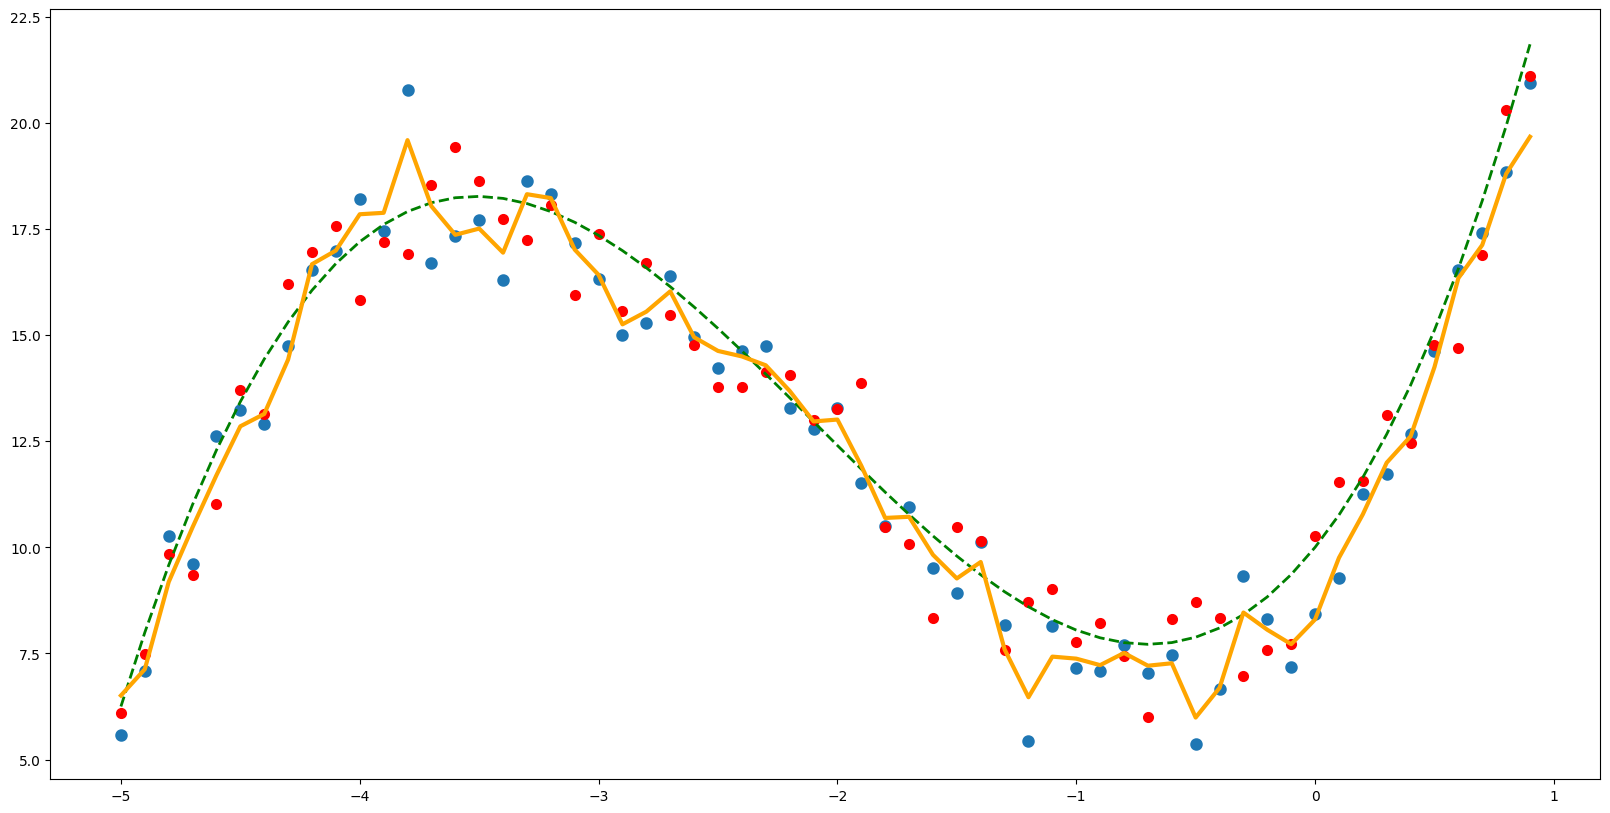

In [33]:
fig = plt.figure(figsize=(20, 10))
fig = plt.plot(df["x"], df["y_true"], lw=2, label="Ground truth", color="green",  linestyle = 'dashed')
fig = plt.scatter(df["x"], df["y_datos_set_1"], lw=3, label="Datos")
fig = plt.plot(df["x"], y_pred, lw=3, color="orange", label="Árbol de decisión")
fig = plt.scatter(df["x"], df["y_datos_set_2"], lw=2, label="Datos", color="red")

In [34]:
# dot_data = export_graphviz(regressor, filled=True, rounded=True, proportion=False)
# graphviz.Source(dot_data)

# Curva de aprendizaje
Primero los resultados del modelo 'baseline'

In [35]:
# para max_depth == 0 (el modelo 'baseline')
df["train_baseline"] = df["y_datos_set_1"].mean()
df["test_baseline"]  = df["y_datos_set_2"].mean()

print("RMSE de nuestro baseline (train):                ",round((mean_squared_error(df["y_datos_set_1"], df["train_baseline"], squared=False)),3))
# y con el otro juego de ruido, es decir datos 'test', nos da:
print("RMSE del baseline de otro juego de datos (test): ",round((mean_squared_error(df["y_datos_set_2"], df["test_baseline"], squared=False)),3))

RMSE de nuestro baseline (train):                 4.246
RMSE del baseline de otro juego de datos (test):  4.036


y los de nuestro ajuste

In [36]:
print("RMSE de nuestro ajuste (train):     ",round((mean_squared_error(df["y_datos_set_1"], y_pred, squared=False)),3))
# y con el otro juego de ruido, es decir datos 'test', nos da:
print("RMSE de otro juego de datos (test): ",round((mean_squared_error(df["y_datos_set_2"], y_pred, squared=False)),3))

RMSE de nuestro ajuste (train):      0.51
RMSE de otro juego de datos (test):  1.155


guardar nuestros resultados aquí

In [37]:
bias_variance_data = {
    'max_depth'      : [0,     1,     2,     3,     4,     5,    6,     7,    8,     9,     10,     11],
    # rellenar los datos aquí de Decision Tree
    'RMSE_DT_train' : [4.295, 3.595, 2.005, 1.565, 0.966, 0.721, 0.63, 0.511, 0.265, 0.123, 0.07, 0.038],
    'RMSE_DT_test'  : [4.175, 3.515, 2.104, 1.638, 1.272, 1.144, 1.199, 1.265, 1.364, 1.351, 1.356, 1.358], 
# We add the Random Forest regressor:
    'RMSE_RF_train' : [4.295, 3.442, 1.756, 1.133, 0.835, 0.729, 0.629, 0.549, 0.508, 0.498, 0.485, 0.511],
    'RMSE_RF_test'  : [4.175, 3.345, 1.767, 1.195, 1.065, 1.045, 1.079, 1.139, 1.152, 1.157, 1.134, 1.136], 

    }
# guardar como un DataFrame
bias_variance_df = pd.DataFrame(bias_variance_data)

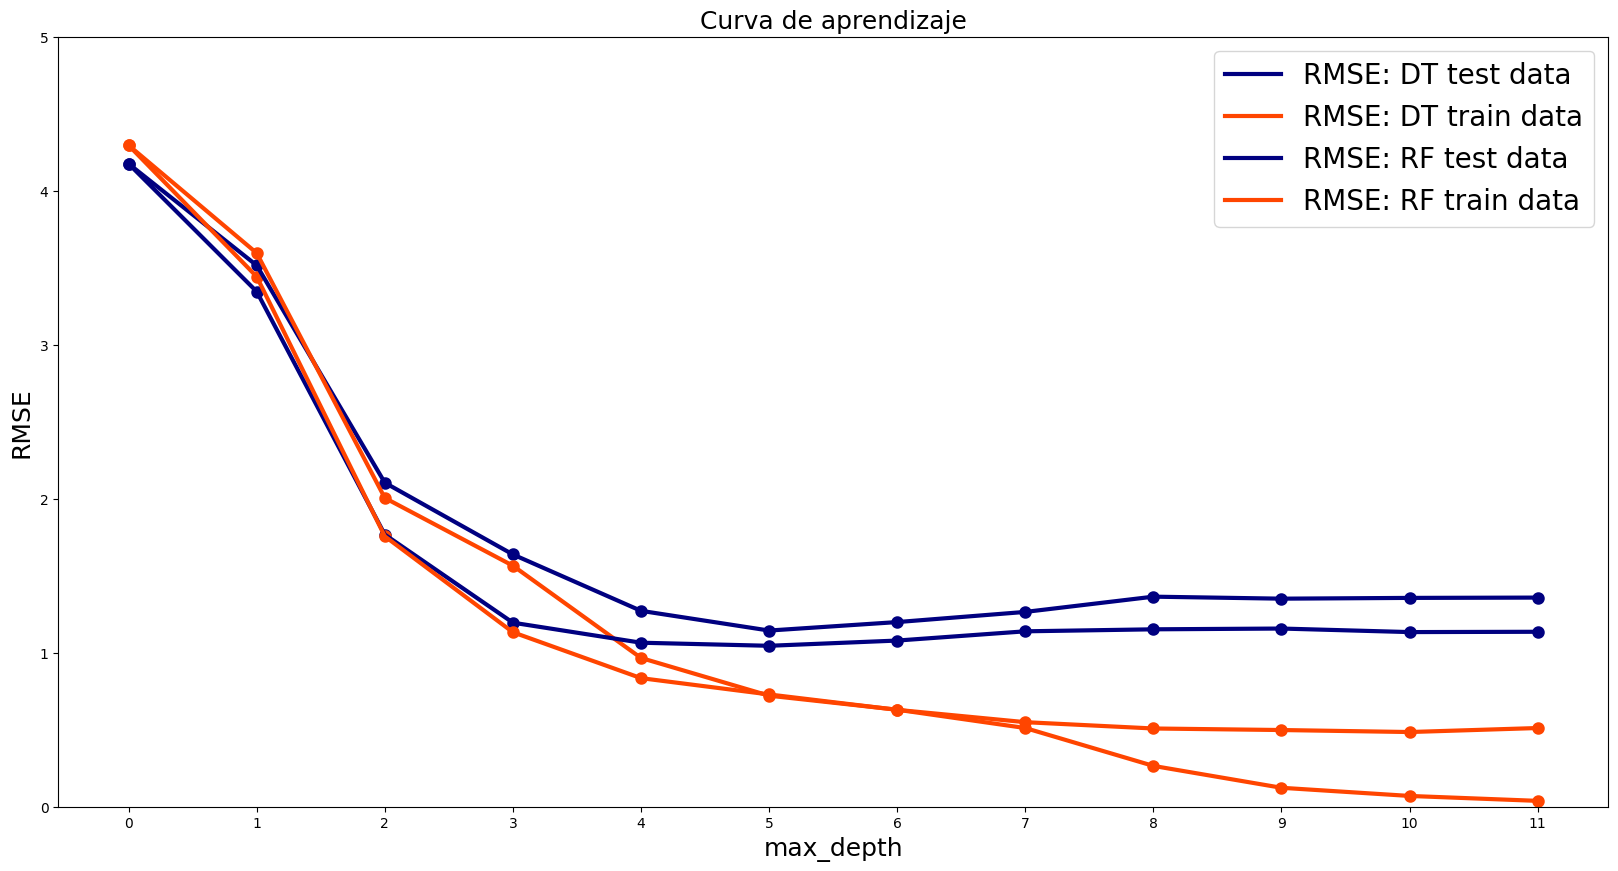

In [38]:
fig = plt.figure(figsize=(20, 10))

fig = plt.plot(   bias_variance_df["max_depth"], bias_variance_df["RMSE_DT_test"],  lw=3, color="navy", label="RMSE: DT test data")
fig = plt.scatter(bias_variance_df["max_depth"], bias_variance_df["RMSE_DT_test"],  lw=3, color="navy")
fig = plt.plot(   bias_variance_df["max_depth"], bias_variance_df["RMSE_DT_train"], lw=3, color="orangered", label="RMSE: DT train data")
fig = plt.scatter(bias_variance_df["max_depth"], bias_variance_df["RMSE_DT_train"], lw=3, color="orangered")

fig = plt.plot(   bias_variance_df["max_depth"], bias_variance_df["RMSE_RF_test"],  lw=3, color="navy", label="RMSE: RF test data")
fig = plt.scatter(bias_variance_df["max_depth"], bias_variance_df["RMSE_RF_test"],  lw=3, color="navy")
fig = plt.plot(   bias_variance_df["max_depth"], bias_variance_df["RMSE_RF_train"], lw=3, color="orangered", label="RMSE: RF train data")
fig = plt.scatter(bias_variance_df["max_depth"], bias_variance_df["RMSE_RF_train"], lw=3, color="orangered")


plt.title('Curva de aprendizaje', fontsize=18)
plt.xlabel('max_depth', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
plt.legend(loc='upper right', fontsize=20)
plt.xticks(np.linspace(0, 11, 12))
plt.ylim(0,5);